In [182]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [156]:
df = pd.read_csv('final_data.csv', 
                 parse_dates = ["Date"])

/Users/sushanthsreenivasa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,9,11,12,13,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [157]:
df.head()

,Commodity Name,City Name,Package,Variety,Grade,Date,Low Price,High Price,Origin,Origin District,Item Size,Environment,Unit of Sale,Quality,Condition,Appearance,Crop,Repack,Market Tone
0,SWEET POTATOES,NEW YORK,40 lb cartons,ORANGE TYPES,U.S. No. 1,2018-01-02,14.0,16.0,NORTH CAROLINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,STEADY.
1,SWEET POTATOES,NEW YORK,40 lb cartons,ORANGE TYPES,U.S. No. 1,2018-01-02,22.0,24.0,NORTH CAROLINA,NaN,"sml 1 3/4-2 1/4"" dia",NaN,NaN,NaN,NaN,NaN,NaN,N,STEADY.
2,SWEET POTATOES,NEW YORK,40 lb cartons,ORANGE TYPES,U.S. No. 1,2018-01-03,14.0,16.0,NORTH CAROLINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,STEADY.
3,SWEET POTATOES,NEW YORK,40 lb cartons,ORANGE TYPES,U.S. No. 1,2018-01-03,22.0,24.0,NORTH CAROLINA,NaN,"sml 1 3/4-2 1/4"" dia",NaN,NaN,NaN,NaN,NaN,NaN,N,STEADY.
4,SWEET POTATOES,NEW YORK,40 lb cartons,ORANGE TYPES,U.S. No. 1,2018-01-04,14.0,16.0,NORTH CAROLINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,STEADY.


In [158]:
df.columns

Index(['Commodity Name', 'City Name', 'Package', 'Variety', 'Grade', 'Date',
       'Low Price', 'High Price', 'Origin', 'Origin District', 'Item Size',
       'Environment', 'Unit of Sale', 'Quality', 'Condition', 'Appearance',
       'Crop', 'Repack', 'Market Tone'],
      dtype='object')

In [159]:
df = df[['Commodity Name', 'City Name','Date',
       'Low Price', 'High Price']]
df

,Commodity Name,City Name,Date,Low Price,High Price
0,SWEET POTATOES,NEW YORK,2018-01-02,14.0,16.0
1,SWEET POTATOES,NEW YORK,2018-01-02,22.0,24.0
2,SWEET POTATOES,NEW YORK,2018-01-03,14.0,16.0
3,SWEET POTATOES,NEW YORK,2018-01-03,22.0,24.0
4,SWEET POTATOES,NEW YORK,2018-01-04,14.0,16.0
...,...,...,...,...,...
657433,AVOCADOS,LOS ANGELES,2016-07-11,35.0,35.0
657434,AVOCADOS,LOS ANGELES,2016-07-08,35.0,35.0
657435,AVOCADOS,LOS ANGELES,2016-07-08,35.0,35.0
657436,AVOCADOS,LOS ANGELES,2016-07-11,35.0,35.0


In [160]:
model_df = df.groupby(['Commodity Name', 'City Name','Date']).agg({'Low Price':'mean',
                                                        'High Price':'mean'}).reset_index()


In [161]:
model_df

,Commodity Name,City Name,Date,Low Price,High Price
0,APPLES,LOS ANGELES,2014-01-02,23.636842,25.010526
1,APPLES,LOS ANGELES,2014-01-03,23.588542,24.947917
2,APPLES,LOS ANGELES,2014-01-06,23.588542,24.947917
3,APPLES,LOS ANGELES,2014-01-07,23.678571,25.071429
4,APPLES,LOS ANGELES,2014-01-08,23.678571,25.071429
...,...,...,...,...,...
25449,WATERMELONS,LOS ANGELES,2018-12-21,15.600000,17.800000
25450,WATERMELONS,LOS ANGELES,2018-12-26,15.600000,17.800000
25451,WATERMELONS,LOS ANGELES,2018-12-27,15.600000,17.800000
25452,WATERMELONS,LOS ANGELES,2018-12-28,15.800000,18.000000


In [162]:
model_df['Date'] = pd.to_datetime(model_df['Date'])

In [163]:
model_df['Month'] = pd.DatetimeIndex(model_df['Date']).month
model_df['Year'] = pd.DatetimeIndex(model_df['Date']).year
model_df['Day'] = pd.DatetimeIndex(model_df['Date']).day
# model_df['Day'] = model_df['Day'].apply(lambda x:x.split('-')[-1])

In [164]:
y_low = model_df['Low Price']
y_high = model_df['High Price']
X = model_df.drop(['Low Price', 'High Price','Date'], axis=1)

In [170]:
from sklearn.model_selection import train_test_split

X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X, y_low, test_size=0.33, random_state=42)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X, y_high, test_size=0.33, random_state=42)

In [171]:
# - Commodity Name
commodity = CountVectorizer()
commodity.fit(X_train_low['Commodity Name'].values)
X_train_commodity_low = commodity.transform(X_train_low['Commodity Name'].values)
X_test_commodity_low = commodity.transform(X_test_low['Commodity Name'].values)

X_train_commodity_high = commodity.transform(X_train_low['Commodity Name'].values)
X_test_commodity_high = commodity.transform(X_test_low['Commodity Name'].values)

# - City Name
city = CountVectorizer()
city.fit(X_train_low['City Name'].values)
X_train_city_low = city.transform(X_train_low['City Name'].values)
X_test_city_low = city.transform(X_test_low['City Name'].values)

X_train_city_high = city.transform(X_train_low['City Name'].values)
X_test_city_high = city.transform(X_test_low['City Name'].values)

,0
0,"(0, 0)\t1\n (0, 1)\t1"
1,"(0, 0)\t1\n (0, 1)\t1"
2,"(0, 0)\t1\n (0, 1)\t1"
3,"(0, 2)\t1\n (0, 3)\t1"
4,"(0, 2)\t1\n (0, 3)\t1"
...,...
8395,"(0, 0)\t1\n (0, 1)\t1"
8396,"(0, 2)\t1\n (0, 3)\t1"
8397,"(0, 0)\t1\n (0, 1)\t1"
8398,"(0, 0)\t1\n (0, 1)\t1"


In [173]:
train = [X_train_low, X_train_high]
test = [X_test_low, X_test_high]



for tr, te in zip(train, test):
    

['apples',
 'avocados',
 'bananas',
 'beans',
 'carrots',
 'corn',
 'garlic',
 'pineapples',
 'potatoes',
 'squash',
 'strawberries',
 'sweet',
 'tomatoes',
 'turnips',
 'watermelons']

In [47]:
model_df1 = pd.get_dummies(model_df, prefix=['Commodity Name', 'City Name'])

In [48]:
model_df1.columns

Index(['Date', 'Low Price', 'High Price', 'Month', 'Year', 'Day',
       'Commodity Name_APPLES', 'Commodity Name_AVOCADOS',
       'Commodity Name_BANANAS', 'Commodity Name_BEANS',
       'Commodity Name_CARROTS', 'Commodity Name_CORN-SWEET',
       'Commodity Name_GARLIC', 'Commodity Name_PINEAPPLES',
       'Commodity Name_POTATOES', 'Commodity Name_SQUASH',
       'Commodity Name_STRAWBERRIES', 'Commodity Name_SWEET POTATOES',
       'Commodity Name_TOMATOES', 'Commodity Name_TURNIPS',
       'Commodity Name_WATERMELONS', 'City Name_LOS ANGELES',
       'City Name_NEW YORK'],
      dtype='object')

In [54]:
model_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25454 entries, 0 to 25453
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           25454 non-null  datetime64[ns]
 1   Low Price                      25445 non-null  float64       
 2   High Price                     25445 non-null  float64       
 3   Month                          25454 non-null  int64         
 4   Year                           25454 non-null  int64         
 5   Day                            25454 non-null  int64         
 6   Commodity Name_APPLES          25454 non-null  uint8         
 7   Commodity Name_AVOCADOS        25454 non-null  uint8         
 8   Commodity Name_BANANAS         25454 non-null  uint8         
 9   Commodity Name_BEANS           25454 non-null  uint8         
 10  Commodity Name_CARROTS         25454 non-null  uint8         
 11  Commodity Name_

In [71]:
model_df1 = model_df1.dropna()

In [75]:
y_low = model_df1['Low Price']
y_high = model_df1['High Price']
X = model_df1.drop(['Low Price', 'High Price','Date'], axis=1)

In [76]:
for col in X.columns:
    X[col] = X[col].astype('int')

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25445 entries, 0 to 25453
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Month                          25445 non-null  int64
 1   Year                           25445 non-null  int64
 2   Day                            25445 non-null  int64
 3   Commodity Name_APPLES          25445 non-null  int64
 4   Commodity Name_AVOCADOS        25445 non-null  int64
 5   Commodity Name_BANANAS         25445 non-null  int64
 6   Commodity Name_BEANS           25445 non-null  int64
 7   Commodity Name_CARROTS         25445 non-null  int64
 8   Commodity Name_CORN-SWEET      25445 non-null  int64
 9   Commodity Name_GARLIC          25445 non-null  int64
 10  Commodity Name_PINEAPPLES      25445 non-null  int64
 11  Commodity Name_POTATOES        25445 non-null  int64
 12  Commodity Name_SQUASH          25445 non-null  int64
 13  Commodity Name_S

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_low, y_test_low = train_test_split(X, y_low, test_size=0.33, random_state=42)
X_train, X_test, y_train_high, y_test_high = train_test_split(X, y_high, test_size=0.33, random_state=42)

In [102]:
def random_forest_forecast(trainX, testX, trainy):
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(testX)
    return yhat, model

In [103]:
y_pred_low, model_low = random_forest_forecast(X_train, X_test, y_train_low)
y_pred_high, model_high = random_forest_forecast(X_train, X_test, y_train_high)

In [184]:
filename = 'finalized_model_high.pkl'
pickle.dump(model_high, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [185]:
filename = 'finalized_model_low.pkl'
pickle.dump(model_low, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [104]:
mean_squared_error(y_test_low, y_pred_low)

5.5674840690473495

In [105]:
mean_squared_error(y_test_high, y_pred_high)

5.810223381389617

<BarContainer object of 20 artists>

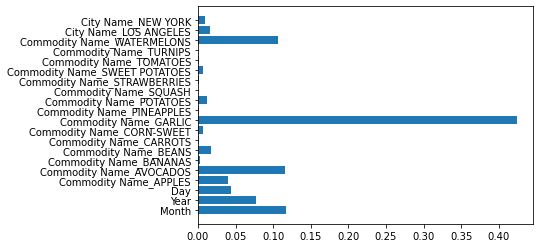

In [111]:
plt.barh(X.columns, model_low.feature_importances_)

<BarContainer object of 20 artists>

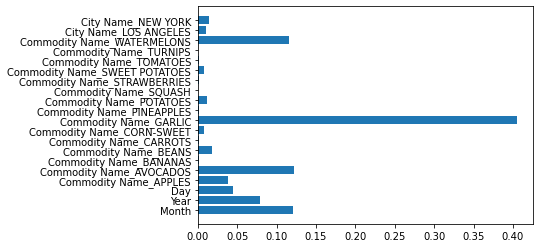

In [112]:
plt.barh(X.columns, model_high.feature_importances_)

In [113]:
X

,Month,Year,Day,Commodity Name_APPLES,Commodity Name_AVOCADOS,Commodity Name_BANANAS,Commodity Name_BEANS,Commodity Name_CARROTS,Commodity Name_CORN-SWEET,Commodity Name_GARLIC,Commodity Name_PINEAPPLES,Commodity Name_POTATOES,Commodity Name_SQUASH,Commodity Name_STRAWBERRIES,Commodity Name_SWEET POTATOES,Commodity Name_TOMATOES,Commodity Name_TURNIPS,Commodity Name_WATERMELONS,City Name_LOS ANGELES,City Name_NEW YORK
0,1,2014,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2014,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2014,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,2014,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2014,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25449,12,2018,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
25450,12,2018,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
25451,12,2018,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
25452,12,2018,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [115]:
model_plot_df = pd.DataFrame()
model_plot_df['Month'] = X_test['Month']
model_plot_df['Year'] = X_test['Year']
model_plot_df['Day'] = X_test['Day']
model_plot_df['Actual_low'] = y_test_low
model_plot_df['Predicted_low'] = y_pred_low
model_plot_df['Actual_high'] = y_test_high
model_plot_df['Predicted_high'] = y_pred_high
model_plot_df

,Month,Year,Day,Actual_low,Predicted_low,Actual_high,Predicted_high
24502,3,2018,5,20.142857,20.116048,21.571429,21.479714
2858,7,2019,23,32.396694,32.703537,33.008264,33.298090
21418,8,2016,25,23.875000,23.747176,24.701389,24.551888
10157,1,2019,30,25.937500,25.490120,26.812500,26.372484
12060,10,2014,23,14.545455,14.560500,15.454545,15.450545
...,...,...,...,...,...,...,...
23694,11,2019,19,25.940299,25.990457,27.313433,27.312929
3755,3,2017,9,52.400000,51.824719,54.800000,55.284682
23469,12,2018,14,20.858491,21.213823,21.952830,22.275804
21761,1,2018,10,20.572917,21.768767,22.156250,23.265183


In [116]:
for col in ['Month', 'Year', 'Day']:
    model_plot_df[col] = model_plot_df[col].astype('str')

In [120]:
model_plot_df['Date'] = model_plot_df['Month'] + '-' + model_plot_df['Day'] + '-' + model_plot_df['Year']

In [122]:
model_plot_df['Date'] = pd.to_datetime(model_plot_df['Date'])

In [134]:
model_plot_df.sort_values(by=['Date'], inplace=True)
model_df1.sort_values(by=['Date'], inplace=True)

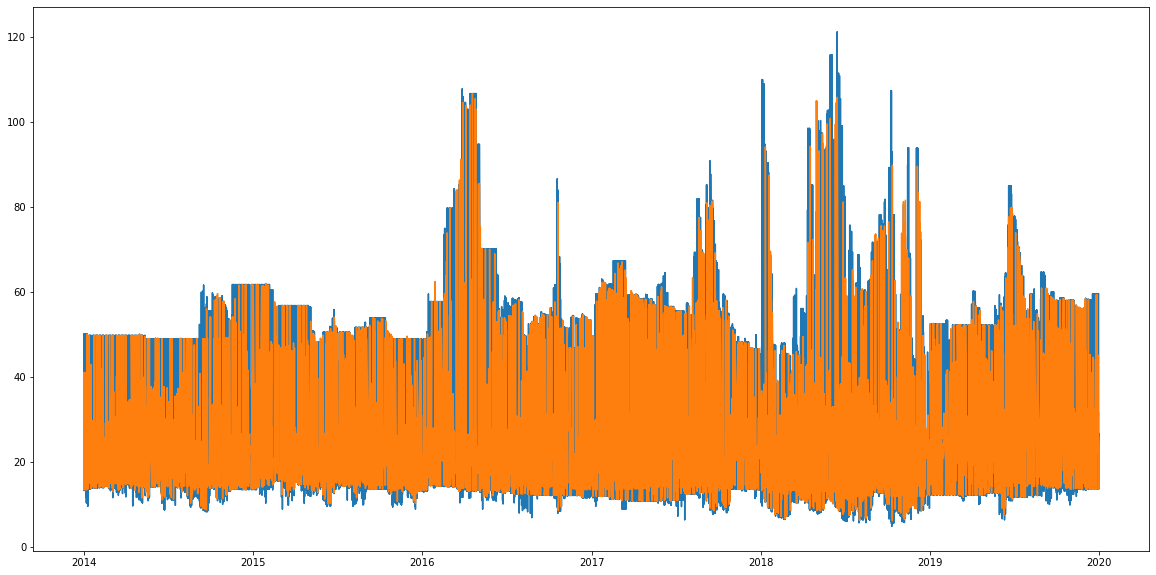

In [135]:
plt.figure(figsize = (20,10))
plt.plot(model_df1['Date'], model_df1['Low Price'])
plt.plot(model_plot_df['Date'], model_plot_df['Predicted_low'])

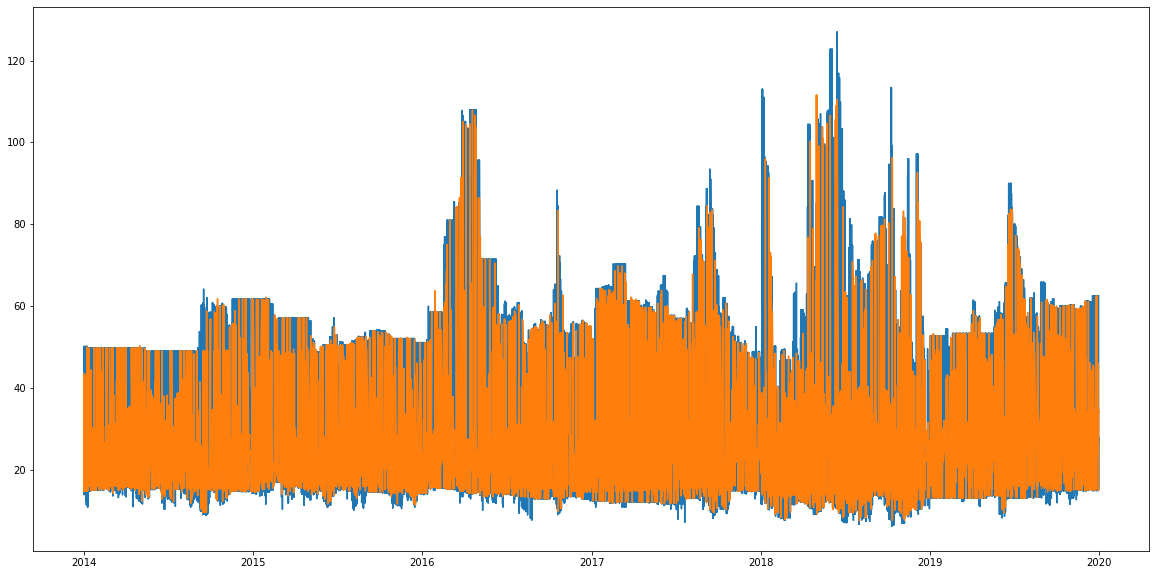

In [136]:
plt.figure(figsize = (20,10))
plt.plot(model_df1['Date'], model_df1['High Price'])
plt.plot(model_plot_df['Date'], model_plot_df['Predicted_high'])

In [179]:
yhat = model_high.predict(np.array([3, 2020, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]).reshape(1, -1))

In [181]:
yhat

array([21.47971429])

In [154]:
model_df1

,Date,Low Price,High Price,Month,Year,Day,Commodity Name_APPLES,Commodity Name_AVOCADOS,Commodity Name_BANANAS,Commodity Name_BEANS,...,Commodity Name_PINEAPPLES,Commodity Name_POTATOES,Commodity Name_SQUASH,Commodity Name_STRAWBERRIES,Commodity Name_SWEET POTATOES,Commodity Name_TOMATOES,Commodity Name_TURNIPS,Commodity Name_WATERMELONS,City Name_LOS ANGELES,City Name_NEW YORK
0,2014-01-02,23.636842,25.010526,1,2014,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22249,2014-01-02,21.353448,22.422414,1,2014,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2964,2014-01-02,27.583333,29.666667,1,2014,2,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11856,2014-01-02,15.272727,16.136364,1,2014,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20754,2014-01-02,19.877193,21.157895,1,2014,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,2019-12-31,15.227273,16.409091,12,2019,31,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
17793,2019-12-31,29.000000,34.500000,12,2019,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13355,2019-12-31,13.700000,15.275000,12,2019,31,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8886,2019-12-31,14.111111,15.222222,12,2019,31,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [177]:
X_test.iloc[0,].to_list()

[3, 2018, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]

In [ ]:
[3, 2020, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]

In [186]:
model_df['Date']

,Commodity Name,City Name,Date,Low Price,High Price,Month,Year,Day
0,APPLES,LOS ANGELES,2014-01-02,23.636842,25.010526,1,2014,2
1,APPLES,LOS ANGELES,2014-01-03,23.588542,24.947917,1,2014,3
2,APPLES,LOS ANGELES,2014-01-06,23.588542,24.947917,1,2014,6
3,APPLES,LOS ANGELES,2014-01-07,23.678571,25.071429,1,2014,7
4,APPLES,LOS ANGELES,2014-01-08,23.678571,25.071429,1,2014,8
...,...,...,...,...,...,...,...,...
25449,WATERMELONS,LOS ANGELES,2018-12-21,15.600000,17.800000,12,2018,21
25450,WATERMELONS,LOS ANGELES,2018-12-26,15.600000,17.800000,12,2018,26
25451,WATERMELONS,LOS ANGELES,2018-12-27,15.600000,17.800000,12,2018,27
25452,WATERMELONS,LOS ANGELES,2018-12-28,15.800000,18.000000,12,2018,28


In [188]:
from datetime import datetime, timedelta
 
now = datetime.now()

dates = []

for x in range(7):
    d = now - timedelta(days=x)
    dates.append(d.strftime("%Y-%m-%d"))

In [189]:
dates

['2022-02-26',
 '2022-02-25',
 '2022-02-24',
 '2022-02-23',
 '2022-02-22',
 '2022-02-21',
 '2022-02-20']

In [196]:
def checker(x):
    if x in dates:
        return True
    else:
        return False
    
high_price = model_df[model_df['Date'].apply(checker)]['High Price']
low_price = model_df[model_df['Date'].apply(checker)]['Low Price']